# P2 submission (Dataset analyzed: Titanic)
The objective here is to analyze the Titanic dataset. A description of the fields in the dataset can be found here https://www.kaggle.com/c/titanic/data.

### 1. Questions?
What variables made passengers more or less likely to survive?<br>
Which **Sex** had more chance to survive? Man or Female?<br>
Did **Age** have some influence?<br>
What about the passenger's **Class (Pclass)**?<br>
Other questions may rise along the way.

### 2. Data Wrangling
Here I will wrangle the dataset to be analyzed. This includes investigating the data, looking for problems and fixing data types.




In [1]:
#importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#seaborn settings
sns.set_style("whitegrid")

#loading dataset
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#checking the dataframe (5 first rows)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking some more information about the dataset
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


#### Wrangling in action
Just by looking at the dataframe's head() and info() we have a lot of information and decide the next steps. We will be cleaning up our data by removing Cabin, Ticket and Embarked columns, merging SisSp and Parch into a new column named FamilyMembers and creating a new dataframe with only the rows that have data for Age



In [4]:
# merging SisSp and Parch into a new column named FamilyMembers
titanic_df['FamilyMembers'] = titanic_df['SibSp'] + titanic_df['Parch']

In [5]:
# removing Cabin, Ticket and Embarked columns
titanic_df.drop(['Embarked', 'Cabin', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [6]:
# creating a new dataframe with only the rows that have data for Age
titanic_df_with_only_filled_ages = titanic_df[~np.isnan(titanic_df['Age'])]

### 3. Exploring
The objective here is to analyze the data after the cleaning up trying to draw some relationships between some of the dependent variables with **Survived**. Histograms and other types of graphs will be used to illustrate these relationships.

#### 3.1. Pclass
Let's check if Pclass correlates with Survived. Did the class influence in the chances of surviving?

In [7]:
print '#### counts per pclass'
print titanic_df.groupby('Pclass')['Survived'].count()
print '####'
print '#### survivals per pclass'
print titanic_df.groupby('Pclass')['Survived'].sum()
print '####'
print '#### proportion of survivals per pclass'
print titanic_df.groupby('Pclass')['Survived'].sum() / titanic_df.groupby('Pclass')['Survived'].count()
print '####'

#### counts per pclass
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
####
#### survivals per pclass
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
####
#### proportion of survivals per pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
####


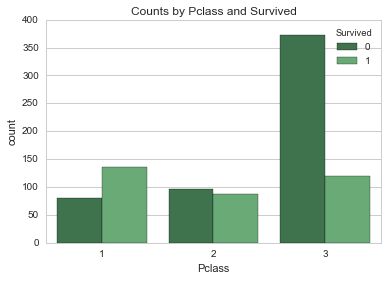

In [8]:
pclass_survived = sns.countplot(x="Pclass", hue="Survived", data=titanic_df, palette="Greens_d");
pclass_survived.set_title('Counts by Pclass and Survived')

**Pclass Conclusions:** The numbers in the "proportion of survivals per pclass" table and the "Counts by Pclass and Survived" graph above clearly shows that passengers from the 1st class had a better chance of surviving that ones in lower classes.

#### 3.2 Sex 
Did women had a better chance of surviving than men?

In [9]:
print '#### counts per pclass'
print titanic_df.groupby('Sex')['Survived'].count()
print '####'
print '#### survivals per pclass'
print titanic_df.groupby('Sex')['Survived'].sum()
print '####'
print '#### proportion of survivals per sex'
print titanic_df.groupby('Sex')['Survived'].sum() / titanic_df.groupby('Sex')['Survived'].count()
print '####'

#### counts per pclass
Sex
female    314
male      577
Name: Survived, dtype: int64
####
#### survivals per pclass
Sex
female    233
male      109
Name: Survived, dtype: int64
####
#### proportion of survivals per sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
####


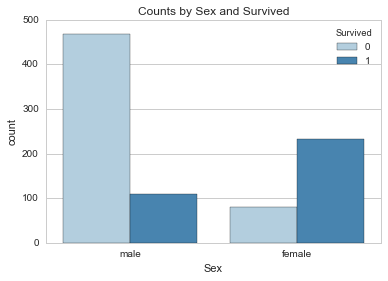

In [10]:
sex_survived = sns.countplot(x="Sex", hue="Survived", data=titanic_df, palette="Blues");
sex_survived.set_title('Counts by Sex and Survived')

**Sex Conclusions:** The numbers in the "proportion of survivals per sex" table and the "Counts by Pclass and Sex" graph above clearly shows that female passengers had a better chance of surviving male passengers.

#### 3.3 Age
Did Age influence in the passengers chance of survival?

In [11]:
print '#### age means'
print titanic_df_with_only_filled_ages.groupby('Survived')['Age'].describe()
print '####'

#### age means
Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64
####


We can not conclude anything from those statistics because they are too close. Let's compare the survived vs non survived Age histograms

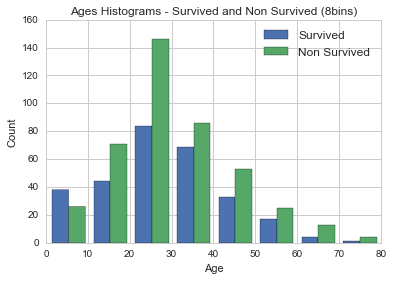

In [12]:
survived_ages = titanic_df_with_only_filled_ages[titanic_df_with_only_filled_ages['Survived'] == 1]['Age']
non_survived_ages = titanic_df_with_only_filled_ages[titanic_df_with_only_filled_ages['Survived'] == 0]['Age']
plt.hist([survived_ages, non_survived_ages], bins=8, label=['Survived','Non Survived'])
plt.title('Ages Histograms - Survived and Non Survived (8bins)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(prop={'size': 12})
plt.show()

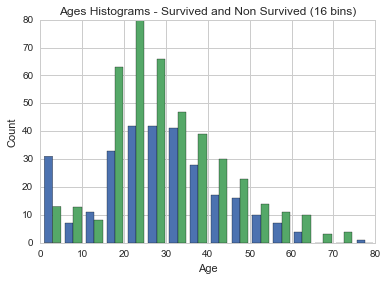

In [13]:
# Changing bins size to closer look at the extreme values (<10 and >60)
plt.hist([survived_ages, non_survived_ages], bins=16)
plt.title('Ages Histograms - Survived and Non Survived (16 bins)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Age conclusions:** Looking at the histograms above I note that Age did not affect passengers change of survival in general but passengers younger than 10 years old had a better chance of surviving while the passengers older than 70 had a worse chance of surviving.

#### 3.4. Analyzing Pclass and Age together

In [14]:
titanic_df.groupby(['Pclass', 'Sex', 'Survived']).count()

PassengerId  Name  Age  Fare  FamilyMembers
Pclass Sex    Survived                                             
1      female 0                   3     3    3     3              3
              1                  91    91   82    91             91
       male   0                  77    77   61    77             77
              1                  45    45   40    45             45
2      female 0                   6     6    6     6              6
              1                  70    70   68    70             70
       male   0                  91    91   84    91             91
              1                  17    17   15    17             17
3      female 0                  72    72   55    72             72
              1                  72    72   47    72             72
       male   0                 300   300  215   300            300
              1                  47    47   38    47             47

The code above shows that for Pclass 1 91 survived and only 3 died. The same pattern didn't happen with the men where for Pclass 1 45 survived and 77 died. We can see this better in the graph below.

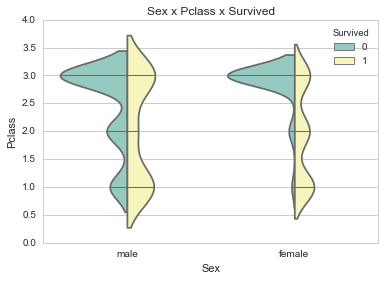

In [15]:
violinplot = sns.violinplot(y="Pclass", x="Sex", hue="Survived", data=titanic_df,
               split=True, inner="stick", palette="Set3");
violinplot.set_title('Sex x Pclass x Survived')

**Pclass and Age conclusions:** When analyzing the graph above where we have Pclass and Sex together we notice some interesting facts. For example a huge proportion of the women in 1st and 2nd class (Pclass=1 and Pclass=2) survived while for the men the proportions are way lower. On the 3rd class (Pclass=3) we can see that the men had a better chance of surviving than the women.  

#### 3.5. Analyzing Age and Sex together

In [16]:
titanic_df_with_only_filled_ages.groupby(['Pclass', 'Sex', 'Survived']).mean()['Age']

Pclass  Sex     Survived
1       female  0           25.666667
                1           34.939024
        male    0           44.581967
                1           36.248000
2       female  0           36.000000
                1           28.080882
        male    0           33.369048
                1           16.022000
3       female  0           23.818182
                1           19.329787
        male    0           27.255814
                1           22.274211
Name: Age, dtype: float64

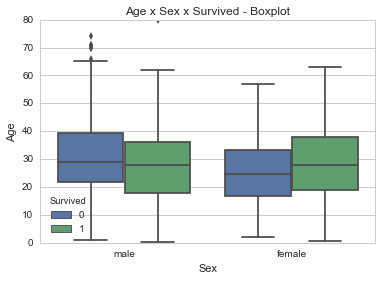

In [17]:
sex_age_boxplot = sns.boxplot(data=titanic_df_with_only_filled_ages, x="Sex", y="Age", hue="Survived")
sex_age_boxplot.set_title("Age x Sex x Survived - Boxplot")

The interesting thing to notice when analyzing this plot is that for the men the mean of Ages for the passengers who survived is slightly lower that for the non survivals while for the women the exctly oposite happens.<br>
Let's see one more graph to see if the Age had influenced men and women differently. 

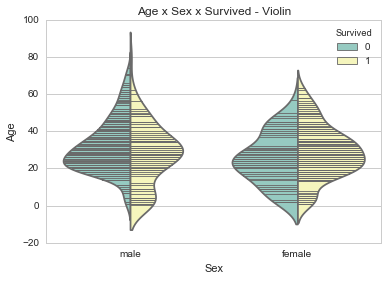

In [18]:
sex_age_violin = sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_df_with_only_filled_ages,
               split=True, inner="stick", palette="Set3");
sex_age_violin.set_title("Age x Sex x Survived - Violin")

This is an interesting view. <br>
**Age and Sex conclusions:** The female side shows that the chance of surviving is almost the same for all ages while for the men we see that the chance of surviving was higher for lower ages - roughly < 10 years old.

#### 3.6 Family Size
Did the family size had effect on the surviving changes of the passengers?

In [32]:
titanic_df.groupby(['Survived']).mean()['FamilyMembers']

Survived
0    0.883424
1    0.938596
Name: FamilyMembers, dtype: float64

Only by anaylising the means above we can't get to any conclusion. The family sizes of the ones who survived and roughly the same of the ones who died. I'm not sure this tells us the whole story about Family Size. Let's dig further.

In [39]:
titanic_df.groupby(['Survived', 'FamilyMembers']).count()['PassengerId']

Survived  FamilyMembers
0         0                374
          1                 72
          2                 43
          3                  8
          4                 12
          5                 19
          6                  8
          7                  6
          10                 7
1         0                163
          1                 89
          2                 59
          3                 21
          4                  3
          5                  3
          6                  4
Name: PassengerId, dtype: int64

**Family Size conclusions: **In the table above we see that passengers with families size of 0 (163/374) was not likely to survive. The same applies for passengers with family sizes bigger then 4. For sizes 2, 3 and 4 we see a different pattern where the number of survivals are bigger than the number of deaths.<br>
The histogram below makes is pretty clear to see this pattern I just explained.

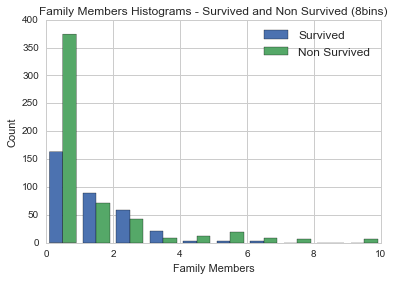

In [37]:
survived_families = titanic_df[titanic_df['Survived'] == 1]['FamilyMembers']
non_survived_families = titanic_df[titanic_df['Survived'] == 0]['FamilyMembers']
plt.hist([survived_families, non_survived_families], label=['Survived','Non Survived'])
plt.title('Family Members Histograms - Survived and Non Survived (8bins)')
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.legend(prop={'size': 12})
plt.show()

### 4. Conclusions
I've drawn conclusions after each topic of the Exploring section above but I'll use this section to state some limitations of the analysis.

#### 4.1. Limitations of the data
One limitations that prevents me from applying the Central Limit Theorem (CLT) and therefore do any statistical inference is that we are not sure that if this sample represents the whole population or in other words that this sample has been randomly assigned.<br>
If we knew that the sample met the CLT conditions we could use Chi-Squared tests and T-tests to statistically test each of the variables.

#### 4.2. Limitations with the Age variable
After noting that the Age column had a lot of NANs I decided to analyze it by removing the NANs from the sample. <br>
Since we are not applying the CLT we didn't have to worry about the randomness of this new sample after removing the NANs and thus this clean up didn't affect the analysis.

#### 4.3. Correlation does not imply causation
All the conclusions drawn above are based solely on observation of the data and doesn't imply causation. Even if we had run statistics tests against the sample correlation does not mean causation, in other words, if one variable correlates with the other it doesn't mean that changing the value of one will **cause** the change in the other.

#### 4.4. What data could help us in this analysis
I think that if we had access to the data for the whole population (for all passengers) that would allow us to run statistical tests and come out with much more precise conclusions about the correlations between the variables.

---

### 5. Findings
All findings are depicted in section 3. Exploring section and its subitems above. Below you have a summary of the findings.

#### 5.1. Pclass
The chance or surviving for passengers with Pclass = 1 is better than for passengers with Pclass = 2 which is better than for passengers with Pclass = 3

P1 chances > P2 chances > P3 chances

#### 5.2 Sex
Females were more likely to survive than males.

#### 5.3. Age
Passengers roughly younger than 10 years old were more likely to survive than other passengers

#### 5.4. Analyzing Pclass and Age together
Women in Pclass 1 and 2 were more likely to survive than men.
Men in Pclass 3 were more likely to survive than women.

#### 5.5. Analyzing Age and Sex together
Age did not affect the survival chances for Women.
Men youger than 10 years old were more likely to survive.

#### 5.6 Family Size
Passengers with family members equals to 2, 3 and 4 were more likely to survive while passengers with less then 2 and more then 4 family memebers were less likely to survive

#### Resources
http://www.stat.ufl.edu/~athienit/Tables/Ttable.pdf<br>
http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas<br>
http://stackoverflow.com/questions/117250/how-do-i-get-a-decimal-value-when-using-the-division-operator-in-python<br>
http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference<br>
http://www-users.cs.umn.edu/~ludford/stat_overview.htm<br>
https://en.wikibooks.org/wiki/Python_Programming/Basic_Math#Mathematical_Operators<br>
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/<br>
http://stackoverflow.com/questions/13404468/t-test-in-pandas-python<br>
http://www.imathas.com/stattools/norm.html<br>
http://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown<br>
http://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
https://www.youtube.com/watch?v=rulIUAN0U3w<br>
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html<br>
https://www.youtube.com/watch?v=E8OQAdQlljE<br>
https://github.com/alfredessa/pdacookbook/blob/master/PythonPandasCookbook5.2.ipynb<br>
https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html<br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind<br>
https://www.youtube.com/watch?v=WXPBoFDqNVk<br>
http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan<br>
https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html#statistical-estimation-within-categories